In [25]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pandas # for data manipulation 
import matplotlib.pyplot as plt

pandas.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

%matplotlib inline

In [2]:
## Checking out the data set for training the model ##
df = pandas.read_csv('E:/Project 5 credits/Final Project/final_dataset.csv', encoding = "ISO-8859-1", header=None,low_memory=False)
df.head()
 # As the data has no column titles, we will add our own
df.columns = ["id", "previousindex", "label","tweet"]

df.head()

,id,previousindex,label,tweet
0,1,0.0,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ
1,2,1.0,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it
2,3,2.0,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker"""
3,4,3.0,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£"
4,5,4.0,0,"Athe than , no time for depression all peh pundegaila"


In [3]:
df.columns[df.isnull().any()].tolist()

['previousindex']

In [4]:
del df["previousindex"]
df.isnull().any().any()

False

In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200001 non-null  int64 
 1   label   200001 non-null  object
 2   tweet   200001 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [6]:
print(df)

            id label  \
0            1     0   
1            2     0   
2            3     0   
3            4     0   
4            5     0   
...        ...   ...   
199996  199997     1   
199997  199998     1   
199998  199999     1   
199999  200000     1   
200000  200001     1   

                                                                                                                                                                 tweet  
0                                                                                        I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ  
1       ranbooâ??s arg is gonna be   less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it  
2                       @ZiaMcCorgi555 Wandavision :  "Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker"  
3                                  

In [7]:
df.dtypes
df.drop(100000, inplace=True)

In [8]:
df['label'] = pandas.to_numeric(df['label'])

In [9]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [10]:
print(df.shape)

(200000, 3)


In [11]:
df['Clean_TweetText'] = df['tweet'].str.replace("@", "") 
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""","ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker"""
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£","ellamAYNiaa BigDaddySamurai shaurya__kumar trarags_ If you lonely and hurt, just say that ð?¤£"
4,5,0,"Athe than , no time for depression all peh pundegaila","Athe than , no time for depression all peh pundegaila"


In [12]:
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,I m exhausted from using so many Megan Thee Stallion lyrics in one story
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,ranboo s arg is gonna be less heavy anxiety inducing than other args me thinks it s still gonna b complicated and shit but i m looking forward to it
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""",ZiaMcCorgi Wandavision Clinically depressed woman is a drag on entire town gets indirect psychotherapy from a nosy neighbour stalker
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£",ellamAYNiaa BigDaddySamurai shaurya kumar trarags If you lonely and hurt just say that
4,5,0,"Athe than , no time for depression all peh pundegaila",Athe than no time for depression all peh pundegaila


In [13]:
stopwords=nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [15]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,exhausted using many megan thee stallion lyrics one story
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,ranboo arg gonna less heavy anxiety inducing args thinks still gonna b complicated shit looking forward
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""",ziamccorgi wandavision clinically depressed woman drag entire town gets indirect psychotherapy nosy neighbour stalker
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£",ellamayniaa bigdaddysamurai shaurya kumar trarags lonely hurt say
4,5,0,"Athe than , no time for depression all peh pundegaila",athe time depression peh pundegaila


In [16]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: x.split())
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,"[exhausted, using, many, megan, thee, stallion, lyrics, one, story]"
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,"[ranboo, arg, gonna, less, heavy, anxiety, inducing, args, thinks, still, gonna, b, complicated, shit, looking, forward]"
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""","[ziamccorgi, wandavision, clinically, depressed, woman, drag, entire, town, gets, indirect, psychotherapy, nosy, neighbour, stalker]"
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£","[ellamayniaa, bigdaddysamurai, shaurya, kumar, trarags, lonely, hurt, say]"
4,5,0,"Athe than , no time for depression all peh pundegaila","[athe, time, depression, peh, pundegaila]"


In [17]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,"[exhaust, use, mani, megan, thee, stallion, lyric, one, stori]"
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,"[ranboo, arg, gonna, less, heavi, anxieti, induc, arg, think, still, gonna, b, complic, shit, look, forward]"
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""","[ziamccorgi, wandavis, clinic, depress, woman, drag, entir, town, get, indirect, psychotherapi, nosi, neighbour, stalker]"
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£","[ellamayniaa, bigdaddysamurai, shaurya, kumar, trarag, lone, hurt, say]"
4,5,0,"Athe than , no time for depression all peh pundegaila","[ath, time, depress, peh, pundegaila]"


In [18]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,exhaust use mani megan thee stallion lyric one stori
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,ranboo arg gonna less heavi anxieti induc arg think still gonna b complic shit look forward
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""",ziamccorgi wandavis clinic depress woman drag entir town get indirect psychotherapi nosi neighbour stalker
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£",ellamayniaa bigdaddysamurai shaurya kumar trarag lone hurt say
4,5,0,"Athe than , no time for depression all peh pundegaila",ath time depress peh pundegaila


In [19]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,Clean_TweetText
0,1,0,I'm exhausted from using so many Megan Thee Stallion lyrics in one story ð?¥µ,exhaust mani megan thee stallion lyric stori
1,2,0,ranbooâ??s arg is gonna be less heavy / anxiety inducing than other args me thinks itâ??s still gonna b complicated and shit but iâ??m looking forward to it,ranboo gonna less heavi anxieti induc think still gonna complic shit look forward
2,3,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depressed woman is a drag on entire town, gets indirect psychotherapy from a nosy neighbour/stalker""",ziamccorgi wandavis clinic depress woman drag entir town indirect psychotherapi nosi neighbour stalker
3,4,0,"@ellamAYNiaa @BigDaddySamurai @shaurya__kumar @trarags_ If you lonely and hurt, just say that ð?¤£",ellamayniaa bigdaddysamurai shaurya kumar trarag lone hurt
4,5,0,"Athe than , no time for depression all peh pundegaila",time depress pundegaila


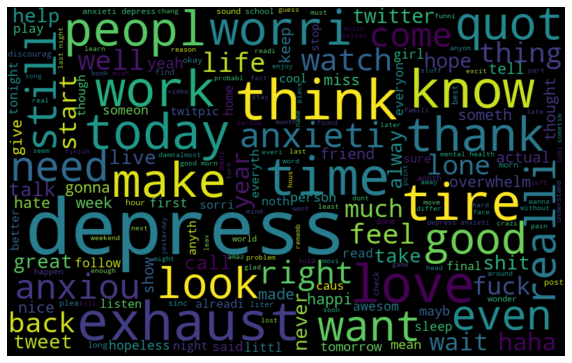

In [20]:
all_words = ' '.join([text for text in df['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

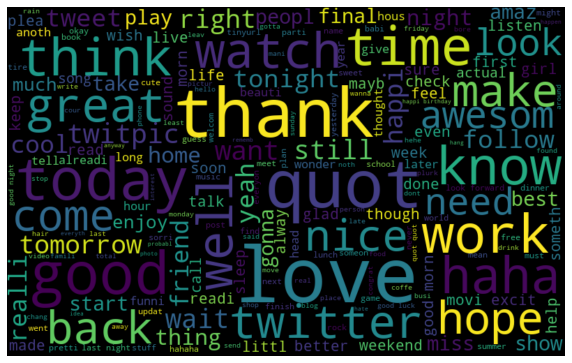

In [21]:
positive_words =' '.join([text for text in df['Clean_TweetText'][df['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

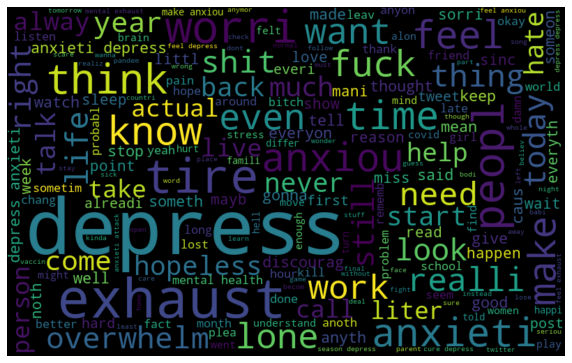

In [22]:
depressive_words =' '.join([text for text in df['Clean_TweetText'][df['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df['Clean_TweetText'])
cv.shape

(200000, 151481)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(cv,df['label'] , test_size=.2,stratify=df['label'], random_state=42)


In [31]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

[08:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.947975


In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))